<a href="https://colab.research.google.com/github/Begizew2112/bearing/blob/main/thesis%20cnn%2B%20lstm%20progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect with google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import all necessary libraries to the preprocessing and **modeling**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the data and change the working processing to T4 GPU
import tensorflow as tf
#load the data in to the workin area
with tf.device('/GPU:0'):
#load the 500000 data
    df = pd.read_csv('/content/drive/MyDrive/reduced10*6.csv',index_col= 0)

In [ ]:

# #reduce the data size for sampling
# # Check the length
# original_len = len(df500000)
# target_len = 200_000

# # Downsample by selecting every N-th row
# step = original_len // target_len
# df_downsampled = df500000.iloc[::step]

# # If it overshoots, trim to exactly 200,000 rows
# df= df_downsampled.head(target_len)


In [ ]:
# check the sample input data
df.head()

,x_direction,y_direction,bearing_temperature,env_temperature
0,-0.117601,-0.378231,41.614912,24.817354
240,0.088048,0.989880,41.614912,24.817354
480,-0.221734,-0.438032,41.614912,24.817354
720,0.205140,0.757906,41.614912,24.817354
960,0.248569,-0.207627,41.614912,24.817354


In [ ]:
#check the size of the data
df.shape

(1000000, 4)

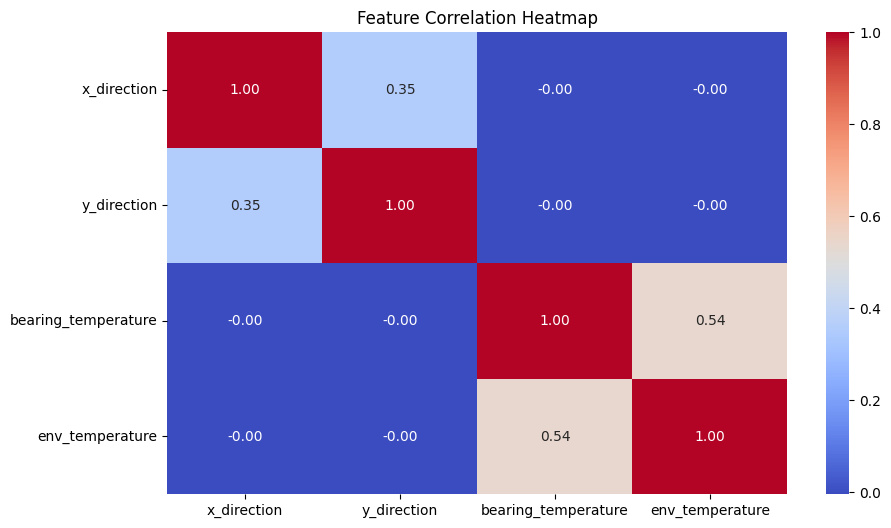

In [ ]:
#view and interprate the correlation analysis of the given columns
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
df1 = df.copy()

In [8]:

total_rows = len(df1)

In [9]:

total_rows

1000000

In [10]:
# Compute elapsed hours
df1['elapsed_hours'] = (np.arange(total_rows) / total_rows) * 128

In [11]:
# Compute RUL , the total life fo the bearing is 128 hour
df1['RUL'] = 128 - df1['elapsed_hours']

In [12]:
df2= df1.copy()

In [13]:
# view the sample data of the first and the last four rows
print(df2.head())
print(df2.tail())

     x_direction  y_direction  bearing_temperature  env_temperature  \
0      -0.117601    -0.378231            41.614912        24.817354   
240     0.088048     0.989880            41.614912        24.817354   
480    -0.221734    -0.438032            41.614912        24.817354   
720     0.205140     0.757906            41.614912        24.817354   
960     0.248569    -0.207627            41.614912        24.817354   

     elapsed_hours         RUL  
0         0.000000  128.000000  
240       0.000128  127.999872  
480       0.000256  127.999744  
720       0.000384  127.999616  
960       0.000512  127.999488  
           x_direction  y_direction  bearing_temperature  env_temperature  \
239998800     0.179271    -0.424473            56.654286        26.404714   
239999040    -0.070367     0.373286            56.654286        26.404714   
239999280     0.139080     0.485448            56.654286        26.404714   
239999520     0.606115     0.562400            56.654286        26.

In [14]:
#check if there is any empty value in the data and fill with appropriate filling method
df2.isnull().sum()

,0
x_direction,31
y_direction,31
bearing_temperature,40
env_temperature,40
elapsed_hours,0
RUL,0


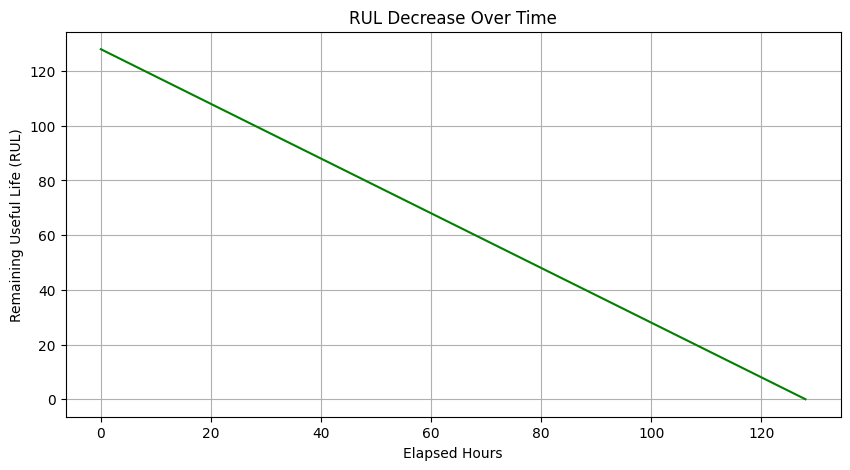

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['RUL'], color='green')
plt.xlabel('Elapsed Hours')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL Decrease Over Time')
plt.grid(True)
plt.show()

In [16]:
df2.head()

,x_direction,y_direction,bearing_temperature,env_temperature,elapsed_hours,RUL
0,-0.117601,-0.378231,41.614912,24.817354,0.000000,128.000000
240,0.088048,0.989880,41.614912,24.817354,0.000128,127.999872
480,-0.221734,-0.438032,41.614912,24.817354,0.000256,127.999744
720,0.205140,0.757906,41.614912,24.817354,0.000384,127.999616
960,0.248569,-0.207627,41.614912,24.817354,0.000512,127.999488


# This code generates a line plot to visualize how the sensor readings for both 'x_direction' and 'y_direction' change over time

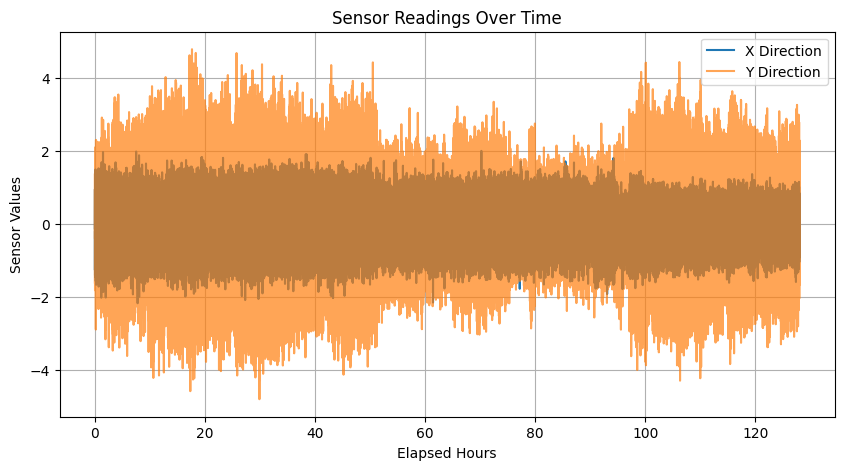

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['x_direction'], label='X Direction')
plt.plot(df2['elapsed_hours'], df2['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

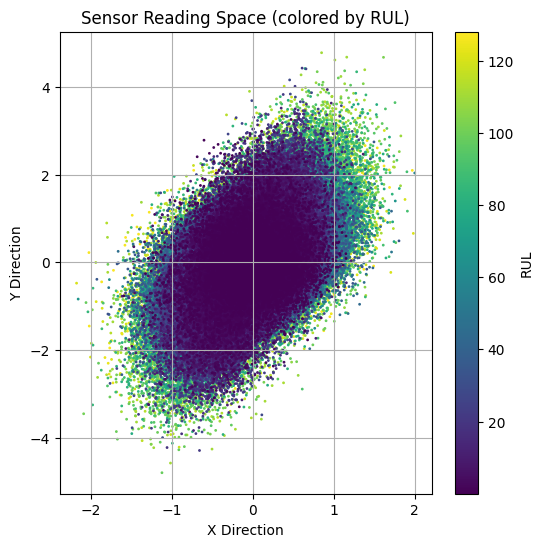

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='viridis', s=1)
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.title('Sensor Reading Space (colored by RUL)')
plt.colorbar(label='RUL')
plt.grid(True)
plt.show()

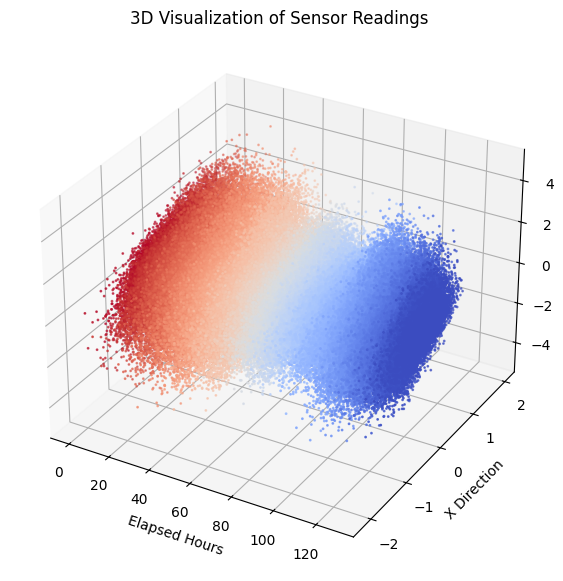

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['elapsed_hours'], df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='coolwarm', s=1)
ax.set_xlabel('Elapsed Hours')
ax.set_ylabel('X Direction')
ax.set_zlabel('Y Direction')
ax.set_title('3D Visualization of Sensor Readings')
plt.show()


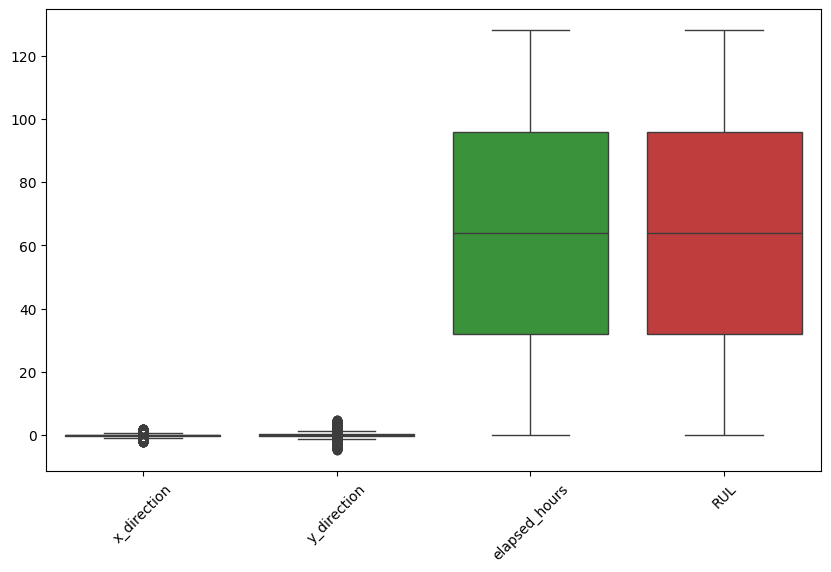

In [ ]:

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

In [18]:
df2.shape

(1000000, 6)

In [19]:
df.columns

Index(['x_direction', 'y_direction', 'bearing_temperature', 'env_temperature'], dtype='object')

In [20]:
df3 = df2.drop(['bearing_temperature','env_temperature'],axis = True)  #drop the bearing temperature and environmental temperature

In [21]:
df3.head()

,x_direction,y_direction,elapsed_hours,RUL
0,-0.117601,-0.378231,0.000000,128.000000
240,0.088048,0.989880,0.000128,127.999872
480,-0.221734,-0.438032,0.000256,127.999744
720,0.205140,0.757906,0.000384,127.999616
960,0.248569,-0.207627,0.000512,127.999488


In [22]:
df3.shape

(1000000, 4)

# This code cleans the dataset by removing outliers to ensure higher-quality data for training the machine learning model. It first calculates the first quartile (Q1) and third quartile (Q3) for each feature in df2, then computes the interquartile range (IQR) as the difference between Q3 and Q1. Using the IQR method, it defines lower and upper bounds to detect outliers. Any data points lying below the lower bound or above the upper bound are considered outliers.

In [23]:

#clean the outlier to get the most useable data for the the traing of the model
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df4 = df3[~((df3 < lower_bound) | (df3 > upper_bound)).any(axis=1)]

In [24]:
df4.shape

(940955, 4)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


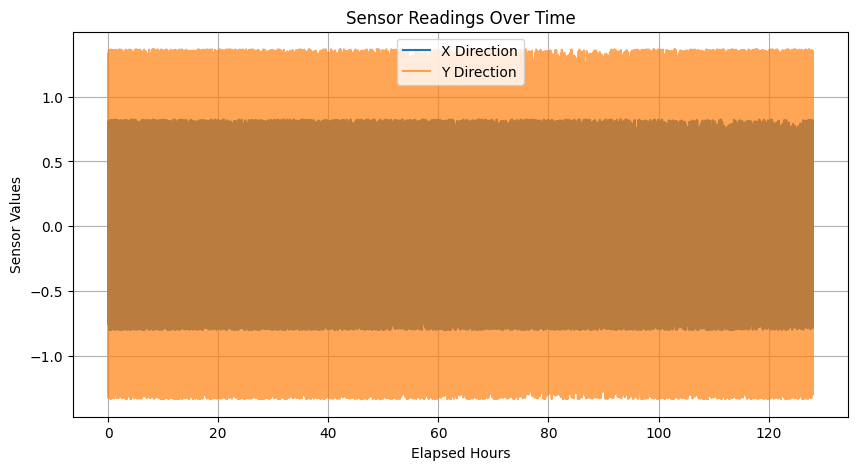

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df4.shape

(940955, 4)

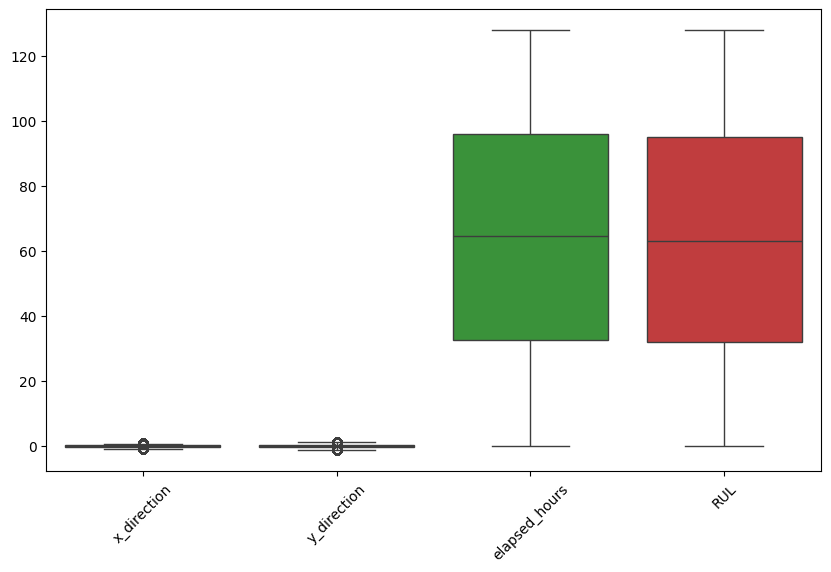

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

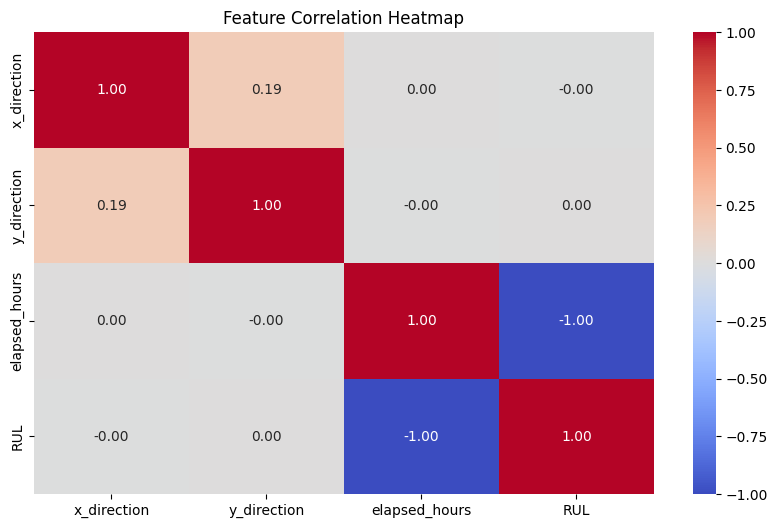

In [ ]:
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df4.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


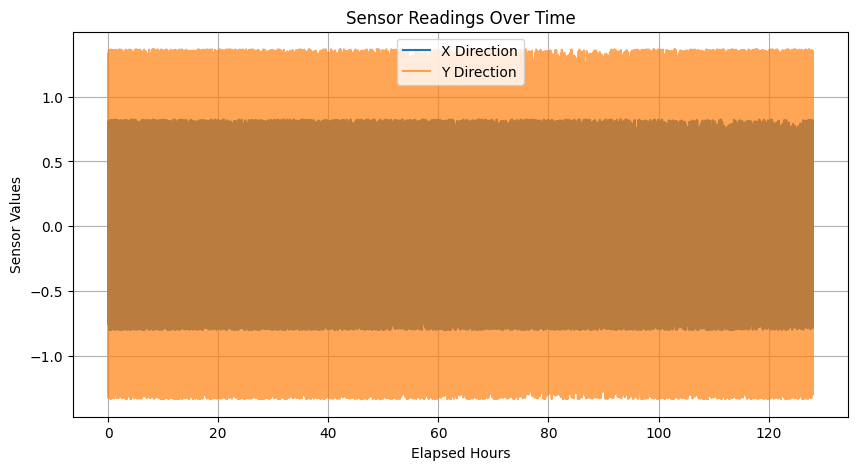

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df4.shape

(940955, 4)

In [25]:
df5 =df4.copy()

In [26]:
# Rolling mean
df5["rolling_mean_x"] = df5["x_direction"].rolling(window=5).mean()
df5["rolling_mean_y"] = df5["y_direction"].rolling(window=5).mean()

# Exponential weighted moving average
df5["ewma_x"] = df5["x_direction"].ewm(span=5).mean()
df5["ewma_y"] = df5["y_direction"].ewm(span=5).mean()

# Difference between consecutive time steps
df5["delta_x"] = df5["x_direction"].diff()
df5["delta_y"] = df5["y_direction"].diff()

# normalization of the given data for better accuracy between 0 and 1

In [27]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select only numerical columns
cols_to_scale = ["x_direction", "y_direction", 'RUL',"elapsed_hours", "rolling_mean_x", "rolling_mean_y", "ewma_x", "ewma_y", "delta_x", "delta_y"]
df5[cols_to_scale] = scaler.fit_transform(df5[cols_to_scale])

In [ ]:
df5.head()

,x_direction,y_direction,elapsed_hours,RUL,rolling_mean_x,rolling_mean_y,ewma_x,ewma_y,delta_x,delta_y
0,0.419627,0.353456,0.000000,1.000000,NaN,NaN,0.381449,0.299343,NaN,NaN
240,0.546543,0.861155,0.000001,0.999999,NaN,NaN,0.498015,0.725962,0.563861,0.764038
480,0.355361,0.331265,0.000002,0.999998,NaN,NaN,0.396201,0.509157,0.403341,0.234381
720,0.618806,0.775070,0.000003,0.999997,NaN,NaN,0.516722,0.667276,0.632757,0.731423
960,0.645608,0.416766,0.000004,0.999996,0.557849,0.569298,0.597587,0.560069,0.513341,0.321971


In [28]:
df5.isnull().sum()

,0
x_direction,31
y_direction,31
elapsed_hours,0
RUL,0
rolling_mean_x,159
rolling_mean_y,159
ewma_x,0
ewma_y,0
delta_x,63
delta_y,63


In [29]:
df6 = df5.dropna()

In [30]:
df6.isnull().sum()

,0
x_direction,0
y_direction,0
elapsed_hours,0
RUL,0
rolling_mean_x,0
rolling_mean_y,0
ewma_x,0
ewma_y,0
delta_x,0
delta_y,0


In [31]:
def create_sequences_fast(data, seq_length):
    data = data.to_numpy()  # Convert DataFrame to NumPy once!
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Features
        y.append(data[i+seq_length, -1])    # Target (RUL)
    return np.array(X), np.array(y)

# Create sequences with a length of 50 (can adjust)
seq_length = 50
X, y = create_sequences_fast(df6, seq_length)


In [32]:
X.shape

(940746, 50, 9)

In [33]:
# Chronological train-test split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [34]:
X_train.shape

(752596, 50, 9)

In [4]:
X_test.shape

NameError: name 'X_test' is not defined

In [36]:
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq


In [3]:
def compute_fft_features(signal_window, sampling_rate=1):
    fft_vals = np.abs(rfft(signal_window))
    freqs = rfftfreq(len(signal_window), d=1/sampling_rate)

    # Avoid divide-by-zero
    if np.sum(fft_vals) == 0:
        return 0, 0, 0

    dominant_freq = freqs[np.argmax(fft_vals)]
    spectral_centroid = np.sum(freqs * fft_vals) / np.sum(fft_vals)
    bandwidth = np.sqrt(np.sum(((freqs - spectral_centroid) ** 2) * fft_vals) / np.sum(fft_vals))

    return dominant_freq, spectral_centroid, bandwidth


In [2]:
def extract_fft_features(X):
    fft_feature_list = []

    for i in range(X.shape[0]):
        x_window = X[i, :, 0]  # x_direction
        y_window = X[i, :, 1]  # y_direction

        # Compute FFT features for both directions
        x_dom, x_cent, x_bw = compute_fft_features(x_window)
        y_dom, y_cent, y_bw = compute_fft_features(y_window)

        fft_feature_list.append([x_dom, x_cent, x_bw, y_dom, y_cent, y_bw])

    return np.array(fft_feature_list)


In [1]:
# Get FFT features for train and test
fft_train = extract_fft_features(X_train)
fft_test = extract_fft_features(X_test)

# Concatenate along the feature axis
# Expand fft features to time steps if needed
fft_train_exp = np.repeat(fft_train[:, np.newaxis, :], X_train.shape[1], axis=1)
fft_test_exp = np.repeat(fft_test[:, np.newaxis, :], X_test.shape[1], axis=1)

# New shape will be (samples, time_steps, features + 6)
X_train_aug = np.concatenate([X_train, fft_train_exp], axis=-1)
X_test_aug = np.concatenate([X_test, fft_test_exp], axis=-1)

print("New shape:", X_train_aug.shape)


NameError: name 'extract_fft_features' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define model using augmented FFT data
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_aug.shape[1], X_train_aug.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dense(1, activation='linear')  # Output layer
])

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,521 (123.13 KB)

 Trainable params: 31,457 (122.88 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
history = model.fit(
    X_train_aug, y_train,
    validation_data=(X_test_aug, y_test),
    epochs=50 ,
    batch_size=64,
    callbacks=[...],  # Add EarlyStopping or ReduceLROnPlateau if needed
    verbose=1
)


Epoch 1/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step - loss: 0.0053 - mae: 0.0816 - val_loss: 0.0050 - val_mae: 0.0792
Epoch 2/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 86s 11ms/step - loss: 0.0041 - mae: 0.0717 - val_loss: 0.0060 - val_mae: 0.0882
Epoch 3/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 75s 10ms/step - loss: 0.0040 - mae: 0.0711 - val_loss: 0.0047 - val_mae: 0.0771
Epoch 4/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - loss: 0.0040 - mae: 0.0710 - val_loss: 0.0043 - val_mae: 0.0732
Epoch 5/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - loss: 0.0040 - mae: 0.0707 - val_loss: 0.0045 - val_mae: 0.0749
Epoch 6/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 0.0040 - mae: 0.0706 - val_loss: 0.0043 - val_mae: 0.0732
Epoch 7/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 0.0040 - mae: 0.0705 - val_loss: 0.0044 - val_mae: 0.0739
Epoch 8/30
5880/5880 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - loss: 0.0040 - mae: 0.0705 - val_loss: 0.0050 - val_mae: 0.0792
Epoch 9/30
5880/5880 ━━━

5880/5880 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


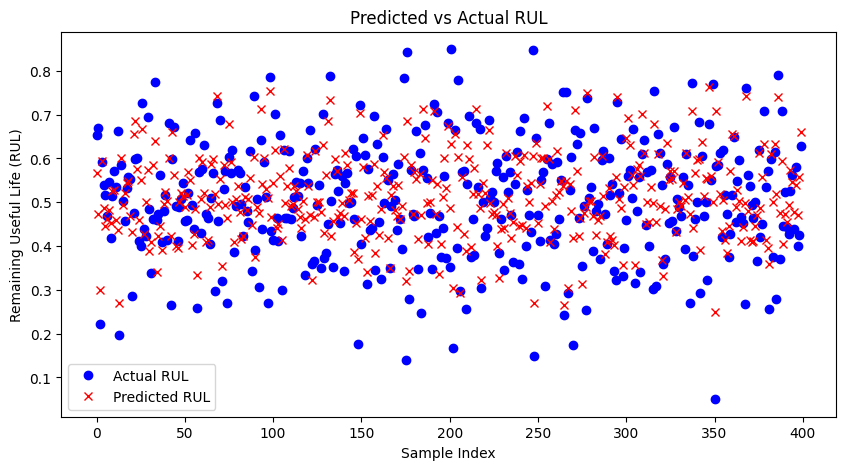

In [ ]:
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test[:400], "bo", label="Actual RUL")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.title("Predicted vs Actual RUL")
plt.show()

In [ ]:
# Predict using the model
y_pred = model.predict(X_test)

# --- Denormalize from [0, 1] to real hours (assuming max life is 128 hours) ---
MAX_RUL_HOURS = 128

y_pred_hours = y_pred * MAX_RUL_HOURS
y_test_hours = y_test * MAX_RUL_HOURS

# --- Print the first few values ---
print("First 10 Predicted RULs in hours:", y_pred_hours[:10].flatten())
print("First 10 Actual RULs in hours:", y_test_hours[:10].flatten())




5880/5880 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
First 10 Predicted RULs in hours: [72.60949  60.543983 38.210472 76.13948  62.24444  57.035614 59.19365
 61.683296 57.999397 67.260826]
First 10 Actual RULs in hours: [83.53685636 85.75452917 28.30297587 75.85993784 68.96888709 66.21842512
 59.89853158 69.7878567  53.6610917  65.9378118 ]


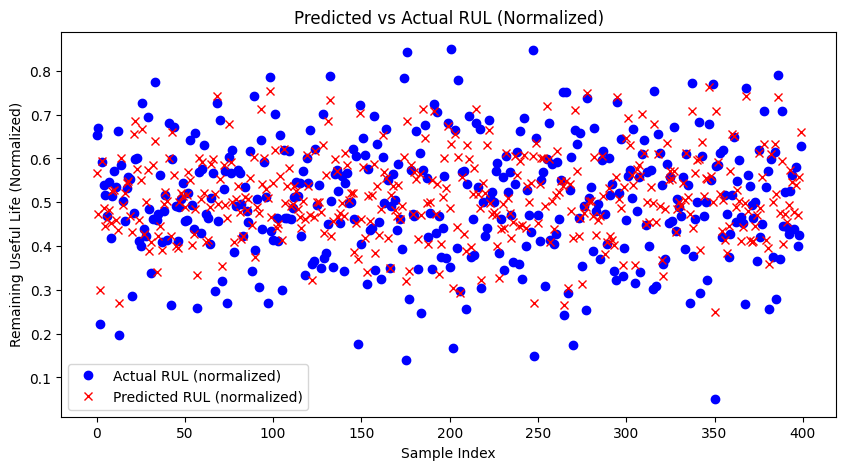

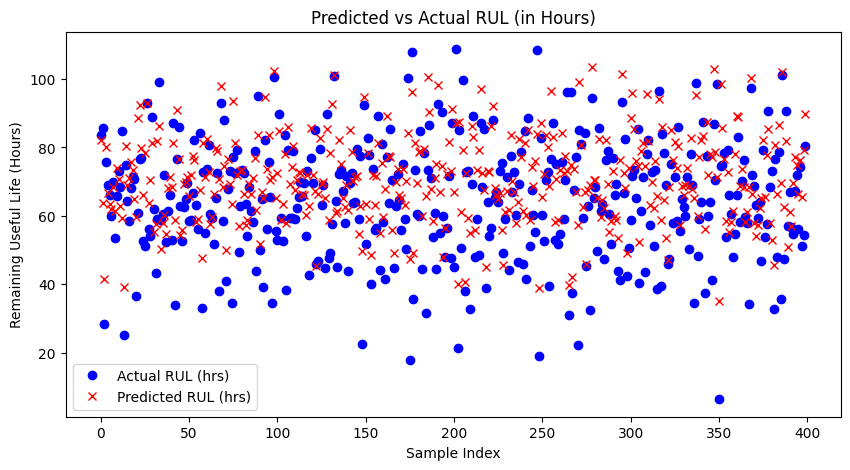

In [ ]:
# --- Plot normalized values (your original plot) ---
plt.figure(figsize=(10, 5))
plt.plot(y_test[:400], "bo", label="Actual RUL (normalized)")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL (normalized)")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (Normalized)")
plt.legend()
plt.title("Predicted vs Actual RUL (Normalized)")
plt.show()

# --- Plot denormalized values (in hours) ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_hours[:400], "bo", label="Actual RUL (hrs)")  # Blue dots
plt.plot(y_pred_hours[:400], "rx", label="Predicted RUL (hrs)")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (Hours)")
plt.legend()
plt.title("Predicted vs Actual RUL (in Hours)")
plt.show()

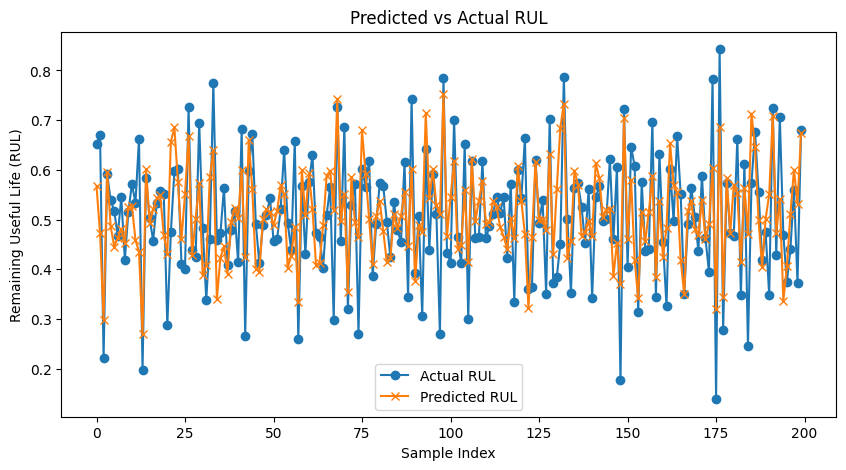

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:200], label="Actual RUL", marker='o')  # First 100 points
plt.plot(y_pred[:200], label="Predicted RUL", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.title("Predicted vs Actual RUL")
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Evaluation Results:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

📊 Model Evaluation Results:
✅ Mean Absolute Error (MAE): 0.0740
✅ Root Mean Squared Error (RMSE): 0.0934
✅ R² Score: 0.5127


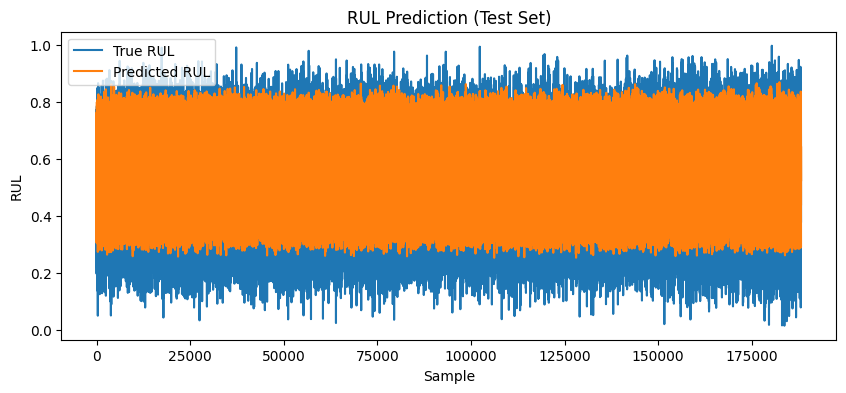

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.title("RUL Prediction (Test Set)")
plt.xlabel("Sample")
plt.ylabel("RUL")
plt.show()

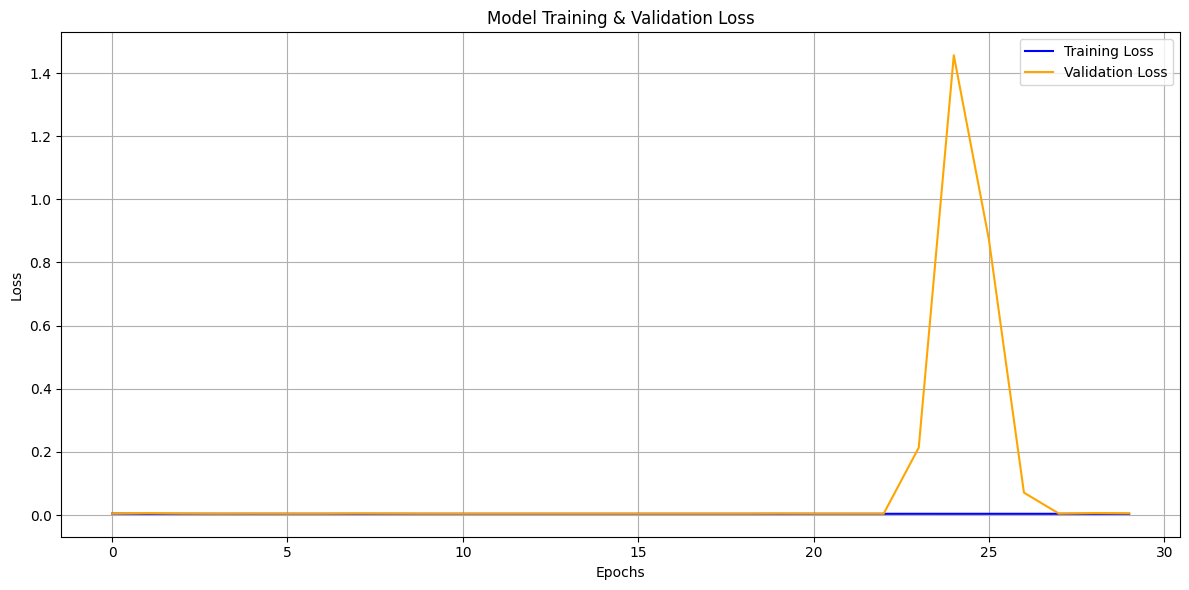

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history (loss and validation loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


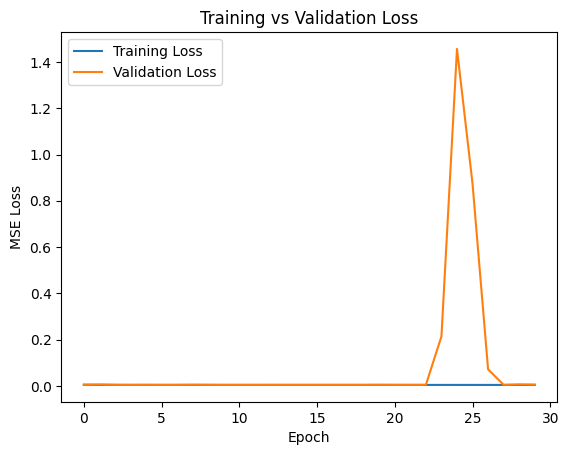

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


5880/5880 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
Test MAE: 0.0833
Test RMSE: 0.1042
Test R²: 0.3937


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test[:200], label='True RUL')
plt.plot(y_pred[:200], label='Predicted RUL')
plt.legend()
plt.title("True vs Predicted Remaining Useful Life")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.show()


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/sample_vibration.csv')

In [ ]:
dff.shape

In [ ]:
dff.head()

In [ ]:
model.save('/content/drive/MyDrive/rul_model1.keras')  # Save as HDF5 file
# you should also save the normalaization methodimport joblib
